In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
card = pd.read_csv("purchase_credit_card.csv")

## Glimpse the Data

In [2]:
card.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


In [3]:
card.dtypes

Year-Month                        int64
Agency Number                     int64
Agency Name                      object
Cardholder Last Name             object
Cardholder First Initial         object
Description                      object
Amount                          float64
Vendor                           object
Transaction Date                 object
Posted Date                      object
Merchant Category Code (MCC)     object
dtype: object

## Clean Data

#### Rename columns

In [5]:
card.columns=['Year_Month', 'Agency_Number', 'Agency_Name', 'Cardholder_Last_Name',
      'Cardholder_First_Initial', 'Description', 'Amount', 'Vendor', 'Transaction_Date',
      'Posted_Date', 'Merchant_Category']

#### Check missing values

In [6]:
card.isnull().sum()

Year_Month                  0
Agency_Number               0
Agency_Name                 0
Cardholder_Last_Name        0
Cardholder_First_Initial    0
Description                 0
Amount                      0
Vendor                      0
Transaction_Date            0
Posted_Date                 0
Merchant_Category           0
dtype: int64

#### Transform datatype

In [7]:
from datetime import datetime
card['Transaction_Date'] = pd.to_datetime(card['Transaction_Date'])

## EDA

First, I utilized aggreation strategy to analyze agency spending behavior. To be specific, features aggreated by agency will be created on top of the raw data.

#### Feature 1: agency_daily_total_amount

In [8]:
agency_daily_total_amount=card.groupby(['Agency_Name','Transaction_Date'])['Amount'].sum()
card1=pd.merge(card,agency_daily_total_amount,how='left',on=['Agency_Name','Transaction_Date'])
card1=card1.rename(columns={"Amount_x": "Amount",'Amount_y':'agency_daily_total_amount'})
card1.head(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,agency_daily_total_amount
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,152258.3
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,152258.3
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,96450.9
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",152258.3
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",152258.3


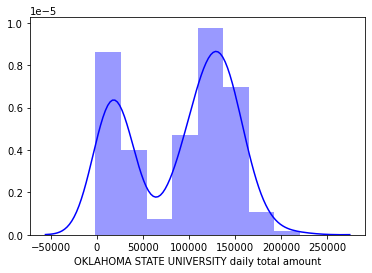

In [9]:
temp = card1[["Agency_Name","Transaction_Date","agency_daily_total_amount"]].drop_duplicates()
temp_ind = temp.set_index('Agency_Name')
temp = temp_ind.loc[['OKLAHOMA STATE UNIVERSITY']]
sns.distplot (temp['agency_daily_total_amount'],hist=True, color = 'b',axlabel = 'OKLAHOMA STATE UNIVERSITY daily total amount')

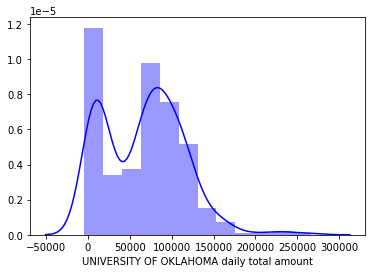

In [10]:
temp2 = card1[["Agency_Name","Transaction_Date","agency_daily_total_amount"]].drop_duplicates()
temp_ind2 = temp2.set_index('Agency_Name')
temp2 = temp_ind2.loc[['UNIVERSITY OF OKLAHOMA']]
sns.distplot (temp2['agency_daily_total_amount'],hist=True, color = 'b',axlabel = 'UNIVERSITY OF OKLAHOMA daily total amount')

#### Feature 2: agency_monthly_average_amount_per_transaction

In [11]:
agency_monthly_average_amount_per_transaction=card.groupby(['Agency_Name','Year_Month'])['Amount'].mean()
card2=pd.merge(card,agency_monthly_average_amount_per_transaction,how='left',on=['Agency_Name','Year_Month'])
card2=card2.rename(columns={"Amount_x": "Amount",'Amount_y':'agency_monthly_average_amount_per_transaction'})
card2.head(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,agency_monthly_average_amount_per_transaction
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,295.959575
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,295.959575
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,295.959575
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",295.959575
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",295.959575


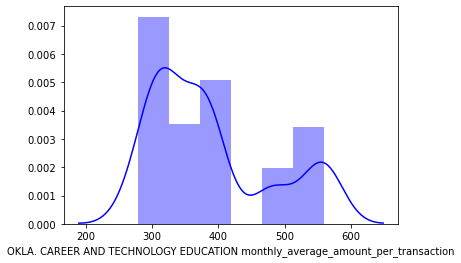

In [12]:
temp = card2[["Agency_Name","Transaction_Date","agency_monthly_average_amount_per_transaction"]].drop_duplicates()
temp_ind = temp.set_index('Agency_Name')
temp = temp_ind.loc[['OKLA. CAREER AND TECHNOLOGY EDUCATION']]
sns.distplot (temp['agency_monthly_average_amount_per_transaction'],hist=True, color = 'b',axlabel = 'OKLA. CAREER AND TECHNOLOGY EDUCATION monthly_average_amount_per_transaction')

From the monetary perspective, I created feature "agency_daily_total_amount" and "agency_monthly_average_amount_per_transaction"

From the distplots of OKLAHOMA STATE UNIVERSITY and UNIVERSITY OF OKLAHOMA, we can see that agency daily total amount distributuion is relatively concentrated within a normal range.

Similarly, from the distplots of OKLA. CAREER AND TECHNOLOGY EDUCATION, we can conclude that agency monthly average amount per transaction is also distributed within a normal range.

So if an agency's daily total transaction amount or monthly average amount per transaction exceeds the normal range, it is worth noting.

#### Feature 3: agency_monthly_max_transaction

In [13]:
agency_monthly_max_transaction=card.groupby(['Agency_Name','Year_Month'])['Amount'].max()
card3=pd.merge(card,agency_monthly_max_transaction,how='left',on=['Agency_Name','Year_Month'])
card3=card3.rename(columns={"Amount_x": "Amount",'Amount_y':'agency_monthly_max_transaction'})
card3.head(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,agency_monthly_max_transaction
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,15120.0
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,15120.0
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,15120.0
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",15120.0
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",15120.0


#### Feature 4: agency_daily_max_transaction

In [14]:
agency_daily_max_transaction=card.groupby(['Agency_Name','Transaction_Date'])['Amount'].max()
card4=pd.merge(card,agency_daily_max_transaction,how='left',on=['Agency_Name','Transaction_Date'])
card4=card4.rename(columns={"Amount_x": "Amount",'Amount_y':'agency_daily_max_transaction'})
card4.head(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,agency_daily_max_transaction
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,5000.00
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,5000.00
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,4488.84
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",5000.00
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",5000.00


From the monetary perspective, I also created feature "agency_monthly_max_transaction" as well as "agency_daily_max_transaction" that both can be used as referrences to agency spending behavior. These 2 features can act like 'alarm border' when we build model to detect fraud.

#### Feature 5: cardholder_daily_average_amount

In [15]:
cardholder_daily_average_amount=card.groupby(['Cardholder_Last_Name',
      'Cardholder_First_Initial','Transaction_Date'])['Amount'].mean()
card5=pd.merge(card,cardholder_daily_average_amount,how='left',on=['Cardholder_Last_Name',
      'Cardholder_First_Initial','Transaction_Date'])
card5=card5.rename(columns={"Amount_x": "Amount",'Amount_y':'cardholder_daily_average_amount'})
card5.head(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,cardholder_daily_average_amount
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,618.24
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,618.24
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,165.82
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",1013.82
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",125.96


#### Feature 6: cardholder_daily_max_transaction

In [16]:
cardholder_daily_max_amount=card.groupby(['Cardholder_Last_Name',
      'Cardholder_First_Initial','Transaction_Date'])['Amount'].max()
card5=pd.merge(card,cardholder_daily_max_amount,how='left',on=['Cardholder_Last_Name',
      'Cardholder_First_Initial','Transaction_Date'])
card5=card5.rename(columns={"Amount_x": "Amount",'Amount_y':'cardholder_daily_max_amount'})
card5.head(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,cardholder_daily_max_amount
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,890.00
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,890.00
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,165.82
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",1931.25
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",125.96


Features 'cardholder_daily_average_amount' and 'cardholder_daily_max_transaction' are necessary supplement to monetary features as they offer information of cardholder spending behavior and give us more details from another dimension in the fraud analysis.

Next, I explored agency spending behavior in terms of merchant category by building barcharts for 2 agencies: UNIVERSITY OF OKLAHOMA and OKLA. CAREER AND TECHNOLOGY EDUCATION, from which we can conclude that agencies spend differently acorss different merchant categories.

In [18]:
temp4 = card[["Agency_Name","Merchant_Category","Amount"]].drop_duplicates()
temp_ind = temp4.set_index('Agency_Name')
temp4 = temp_ind.loc[['UNIVERSITY OF OKLAHOMA']]

[Text(0, 0, 'AMERICAN AIRLINES'),
 Text(0, 0, 'INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED'),
 Text(0, 0, 'SOUTHWEST AIRLINES'),
 Text(0, 0, 'TELECOMMUNICATION SERVICES'),
 Text(0, 0, 'UNITED AIRLINES'),
 Text(0, 0, 'BOOK STORES'),
 Text(0, 0, 'PLUMBING AND HEATING EQUIPMENT AND SUPPLIES'),
 Text(0, 0, 'LODGING--HOTELS,MOTELS,AND RESORTS'),
 Text(0, 0, 'COMMERCIAL EQUIPMENT, NOT ELSEWHERE CLASSIFIED'),
 Text(0, 0, 'DELTA')]

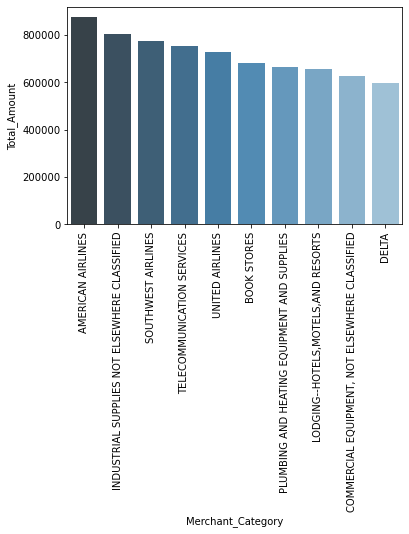

In [19]:
sum_amount_merchant=temp4.groupby('Merchant_Category').Amount.sum().sort_values(ascending=False).reset_index(name='Total_Amount')
chart=sns.barplot(data=sum_amount_merchant.head(10),x='Merchant_Category',y='Total_Amount',palette="Blues_d")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [20]:
temp5 = card[["Agency_Name","Merchant_Category","Amount"]].drop_duplicates()
temp_ind = temp5.set_index('Agency_Name')
temp5 = temp_ind.loc[['OKLA. CAREER AND TECHNOLOGY EDUCATION']]

[Text(0, 0, 'STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITING PAPER'),
 Text(0, 0, 'COMPUTERS, COMPUTER PERIPHERAL EQUIPMENT, SOFTWARE'),
 Text(0, 0, 'OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM EQUIPMENT'),
 Text(0, 0, 'TELECOMMUNICATION SERVICES'),
 Text(0, 0, 'INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED'),
 Text(0, 0, 'BOOK STORES'),
 Text(0, 0, 'MISCELLANEOUS PUBLISHING AND PRINTING SERVICES'),
 Text(0, 0, 'ELECTRONICS STORES'),
 Text(0, 0, 'COURIER SERVICES-AIR AND GROUND,AND FREIGHT FORWARDERS'),
 Text(0, 0, 'MISCELLANEOUS AND SPECIALTY RETAIL STORES')]

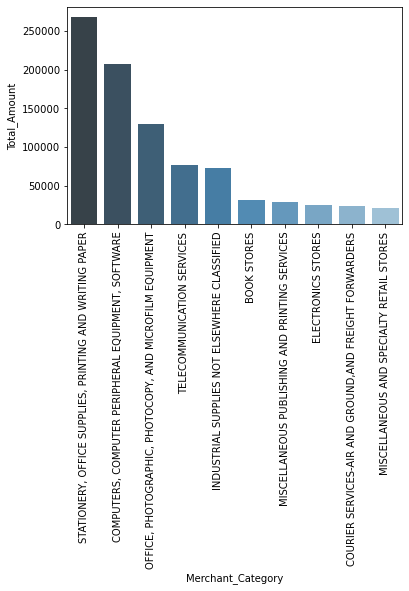

In [21]:
sum_amount_merchant=temp5.groupby('Merchant_Category').Amount.sum().sort_values(ascending=False).reset_index(name='Total_Amount')
chart=sns.barplot(data=sum_amount_merchant.head(10),x='Merchant_Category',y='Total_Amount',palette="Blues_d")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

I believe that aggregation by spending amount and time is not enough to observe spending behavioral patterns. Thus, I built features:

"agency_daily_average_amount_category", "agency_daily_max_amount_category", "agency_daily_total_amount_category", "cardholder_daily_average_amount_category", "cardholder_daily_max_amount_category", "cardholder_daily_total_amount_category"

These features take into account spending by category, providing critical details in transaction patterns of agencies as well as cardholders. Daily average amount and daily total amount can act like reference for transaction habit while max value can act like 'alarm border' or threshold in detecting defects.

I believe that aggregation by spending amount and time is not enough to observe spending behavioral patterns. Thus, I built features:

"agency_daily_average_amount_category": the daily average amount that an agency spend at merchant category level "agency_daily_max_amount_category": the maximum daily amount that an agency spend at merchant category level "agency_daily_total_amount_category": the total daily amount that an agency spend at merchant category level "cardholder_daily_average_amount_category": the average daily amount that a card holder spend at merchant category level "cardholder_daily_max_amount_category": the maximum daily amount that a card holder spend at merchant category level "cardholder_daily_total_amount_category": the total daily amount that a card holder spend on per merchant category

These features take into account spending by category, providing critical details in transaction patterns of agencies as well as cardholders. Daily average amount and daily total amount can act like reference for transaction habit while max value can act like 'alarm border' or threshold in detecting defects.

#### Feature 7: the daily average amount that an agency spend per merchant category¶

In [22]:
cardholder_daily_average_amount=card.groupby(['Agency_Name','Transaction_Date','Merchant_Category'])['Amount'].mean()
card7=pd.merge(card,cardholder_daily_average_amount,how='left',on=['Agency_Name','Transaction_Date','Merchant_Category'])
card7=card7.rename(columns={"Amount_x": "Amount",'Amount_y':'agency_daily_average_amount_category'})
card7.head(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,agency_daily_average_amount_category
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,529.062500
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,346.480000
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,161.021111
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",46.278824
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",547.204000


#### Feature 8: agency_daily_max_amount_category

In [23]:
agency_daily_max_amount=card.groupby(['Agency_Name','Transaction_Date','Merchant_Category'])['Amount'].max()
card8=pd.merge(card,agency_daily_max_amount,how='left',on=['Agency_Name','Transaction_Date','Merchant_Category'])
card8=card8.rename(columns={"Amount_x": "Amount",'Amount_y':'agency_daily_max_amount_category'})
card8.head(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,agency_daily_max_amount_category
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,890.00
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,368.96
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,500.00
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",201.20
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",1132.88


#### Feature 9: agency_daily_total_amount_category

In [24]:
agency_daily_total_amount_category=card.groupby(['Agency_Name','Transaction_Date','Merchant_Category'])['Amount'].sum()
card9=pd.merge(card,agency_daily_total_amount_category,how='left',on=['Agency_Name','Transaction_Date','Merchant_Category'])
card9=card9.rename(columns={"Amount_x": "Amount",'Amount_y':'agency_daily_total_amount_category'})
card9.head(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,agency_daily_total_amount_category
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2116.25
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,692.96
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,1449.19
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",786.74
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",2736.02


In [25]:
cardholder_daily_average_amount_category=card.groupby(['Cardholder_Last_Name','Cardholder_First_Initial','Transaction_Date','Merchant_Category'])['Amount'].mean()
card10=pd.merge(card,cardholder_daily_average_amount_category,how='left',on=['Cardholder_Last_Name','Cardholder_First_Initial','Transaction_Date','Merchant_Category'])
card10=card10.rename(columns={"Amount_x": "Amount",'Amount_y':'cardholder_daily_average_amount_category'})
card10.head(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,cardholder_daily_average_amount_category
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,890.00
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,346.48
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,165.82
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",96.39
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",125.96


#### Feature 10:cardholder_daily_average_amount_category

In [26]:
cardholder_daily_average_amount_category=card.groupby(['Cardholder_Last_Name','Cardholder_First_Initial','Transaction_Date','Merchant_Category'])['Amount'].mean()
card10=pd.merge(card,cardholder_daily_average_amount_category,how='left',on=['Cardholder_Last_Name','Cardholder_First_Initial','Transaction_Date','Merchant_Category'])
card10=card10.rename(columns={"Amount_x": "Amount",'Amount_y':'cardholder_daily_average_amount_category'})
card10.head(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,cardholder_daily_average_amount_category
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,890.00
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,346.48
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,165.82
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",96.39
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",125.96


#### Feature 11: cardholder_daily_max_amount_category

In [27]:
cardholder_daily_max_amount_category=card.groupby(['Cardholder_Last_Name','Cardholder_First_Initial','Transaction_Date','Merchant_Category'])['Amount'].max()
card11=pd.merge(card,cardholder_daily_max_amount_category,how='left',on=['Cardholder_Last_Name','Cardholder_First_Initial','Transaction_Date','Merchant_Category'])
card11=card11.rename(columns={"Amount_x": "Amount",'Amount_y':'cardholder_daily_max_amount_category'})
card11.head(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,cardholder_daily_max_amount_category
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,890.00
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,368.96
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,165.82
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",96.39
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",125.96


#### Feature 12: cardholder_daily_total_amount_category

In [28]:
cardholder_daily_total_amount_category=card.groupby(['Cardholder_Last_Name','Cardholder_First_Initial','Transaction_Date','Merchant_Category'])['Amount'].sum()
card12=pd.merge(card,cardholder_daily_total_amount_category,how='left',on=['Cardholder_Last_Name','Cardholder_First_Initial','Transaction_Date','Merchant_Category'])
card12=card12.rename(columns={"Amount_x": "Amount",'Amount_y':'cardholder_daily_total_amount_category'})
card12.head(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,cardholder_daily_total_amount_category
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,1780.00
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,692.96
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,165.82
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",96.39
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",125.96


From the frequency perspective, I built the following 4 features:

"agency_monthly_total_number_of_transactions_vendor", "cardholder_monthly_total_number_of_transactions_vendor", "agency_monthly_total_number_of_transactions_category", "cardholder_monthly_total_number_of_transactions_category",

Because fraudsters may want to use high-freqeuncy and small-amount transaction to avoid detection, we need to monitor transaction frequency by including those features in our model. Besides, new vendor or category transaction is also worth noting. Thus, I also recommend to take raw features, "Vendor" and "Merchant_Category" into account.

#### Feature 13: agency_monthly_total_number_of_transactions_vendor

In [29]:
agency_monthly_total_number_of_transactions_vendor=card.groupby(['Agency_Name','Year_Month','Vendor'])['Amount'].count()
card13=pd.merge(card,agency_monthly_total_number_of_transactions_vendor,how='left',on=['Agency_Name','Year_Month','Vendor'])
card13=card13.rename(columns={'Amount_x':'Amount',"Amount_y":"agency_monthly_total_number_of_transactions_vendor"})
card13.head(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,agency_monthly_total_number_of_transactions_vendor
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,4
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,2
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,1
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",223
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",30


#### Feature 14: cardholder_monthly_total_number_of_transactions_vendor

In [30]:
cardholder_monthly_total_number_of_transactions_vendor=card.groupby(['Cardholder_Last_Name','Cardholder_First_Initial','Year_Month','Vendor'])['Amount'].count()
card14=pd.merge(card,cardholder_monthly_total_number_of_transactions_vendor,how='left',on=['Cardholder_Last_Name','Cardholder_First_Initial','Year_Month','Vendor'])
card14=card14.rename(columns={'Amount_x':'Amount',"Amount_y":"cardholder_monthly_total_number_of_transactions_vendor"})
card14.head(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,cardholder_monthly_total_number_of_transactions_vendor
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,2
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,1
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",1
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",1


#### Feature 15: agency_monthly_total_number_of_transactions_category

In [31]:
agency_monthly_total_number_of_transactions_category=card.groupby(['Agency_Name','Year_Month','Merchant_Category'])['Amount'].count()
card15=pd.merge(card,agency_monthly_total_number_of_transactions_category,how='left',on=['Agency_Name','Year_Month','Merchant_Category'])
card15=card15.rename(columns={'Amount_x':'Amount',"Amount_y":"agency_monthly_total_number_of_transactions_category"})
card15.head(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,agency_monthly_total_number_of_transactions_category
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,91
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,25
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,203
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",636
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",239


#### Feature 16: cardholder_monthly_total_number_of_transactions_category

In [32]:
cardholder_monthly_total_number_of_transactions_category=card.groupby(['Cardholder_Last_Name','Cardholder_First_Initial','Year_Month','Merchant_Category'])['Amount'].count()
card16=pd.merge(card,cardholder_monthly_total_number_of_transactions_category,how='left',on=['Cardholder_Last_Name','Cardholder_First_Initial','Year_Month','Merchant_Category'])
card16=card16.rename(columns={'Amount_x':'Amount',"Amount_y":"cardholder_monthly_total_number_of_transactions_category"})
card16.head(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,cardholder_monthly_total_number_of_transactions_category
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,7
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,1
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",1
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",2


Based on the principel of recency, I built the following features:

"days_passed_agency_merchant": days passed since last transaction by agency with the same category "days_passed_cardholder_category": days passed since last transaction by cardholder with the same category

These 2 features draw portraits of transaction time intervals, which will be abnormal, become shorter than usual, in the case of fraud transaction. Thus, we should take these 2 features into account.

In [33]:
from datetime import datetime, timedelta 
snapshot_date=card['Transaction_Date'].max()+timedelta(days=1)
card['days_passed'] = card['Transaction_Date'].agg(
   {lambda x: (snapshot_date - x).days})
print(snapshot_date)

2014-07-01 00:00:00


#### Feature 17: days_passed_agency_merchant

In [34]:
days_passed_agency_merchant=card.groupby(['Agency_Name','Merchant_Category']).apply(lambda x:x.sort_values(['days_passed']))['days_passed'].diff()
print(days_passed_agency_merchant)

Agency_Name                      Merchant_Category                                 
ARDMORE HIGHER EDUCATION CENTER  BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED  146549     NaN
                                 CATALOG MERCHANTS                           146545   -20.0
                                                                             146543     1.0
                                                                             146532    51.0
                                                                             146523    32.0
                                                                                       ... 
`DEPARTMENT OF EDUCATION         WYNDHAM HOTELS                              96707     14.0
                                                                             96687     12.0
                                                                             96688      0.0
                                                                             96689      

#### Feature 18: days_passed_cardholder_category

In [35]:
days_passed_cardholder_category=card.groupby(['Cardholder_Last_Name','Cardholder_First_Initial','Merchant_Category']).apply(lambda x:x.sort_values(['days_passed']))['days_passed'].diff()
print(days_passed_cardholder_category)

Cardholder_Last_Name  Cardholder_First_Initial  Merchant_Category        
15000                 1                         OTHER FEES         295887     NaN
24100                 2                         OTHER FEES         297113    -4.0
                                                                   297114     0.0
                                                                   95884     58.0
                                                                   95855     20.0
                                                                             ... 
russell               s                         TRAVEL AGENCIES    396173     6.0
                                                                   396174     0.0
                                                                   396176     0.0
                                                                   396168     1.0
                                                UNITED AIRLINES    396175     0.0
Name: days_passed, Lengt

The last 2 featrues that I built are ratios that reflect the rationality of each transaction comparing to mean transaction amount and max transaction amount. They are also monetary features.

#### Feature 19: agency_amount_mean_ratio

rasaction amount/mean amount spent in one transaction by agency at merchant category level

In [36]:
agency_amount_mean_ratio=card.groupby(['Agency_Name','Merchant_Category'])['Amount'].mean()
card19=pd.merge(card,agency_amount_mean_ratio,how='left',on=['Agency_Name','Merchant_Category'])
card19['agency_amount_mean_ratio']=card19['Amount_x']/card19['Amount_y']
card19=card19.drop(columns=['Amount_y'])
card19=card19.rename(columns={"Amount_x": "Amount"})
card19.head(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,days_passed,agency_amount_mean_ratio
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,336,2.081219
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,336,0.974461
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,337,0.422515
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",336,1.611007
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",336,0.464432


#### Feature 20: agency_amount_max_ratio¶¶

trasaction amount/max amount spent in one transaction by agency at merchant category level

In [37]:
agency_amount_max_ratio=card.groupby(['Agency_Name','Merchant_Category'])['Amount'].max()
card20=pd.merge(card,agency_amount_max_ratio,how='left',on=['Agency_Name','Merchant_Category'])
card20['agency_amount_max_ratio']=card20['Amount_x']/card20['Amount_y']
card20=card20.drop(columns=['Amount_y'])
card20=card20.rename(columns={"Amount_x": "Amount"})
card20.head(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,days_passed,agency_amount_max_ratio
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,336,0.091352
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,336,0.057642
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,337,0.020318
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",336,0.030160
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",336,0.025197
